## Extraction of a time series of Degree Heating Weeks (DHW) from the NOAA CRW collection

*This is the notebook used to create the timeseries plot showcased in the DMS Newsletter #2*

If you want to try this notebook using NECTAR's JupyterHub service just click here (you need to have an academic email registered with AAF): [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ausseabed/dms-newsletter-2/HEAD?filepath=notebooks%2FDHW_timeseries.ipynb)

What you need to know:
- the location of the Great Barrier Reef you want to assess. It must be a single point (lat, lon)
- the time period you want to assess. It must be a range of years (e.g. 2010-2019)
- the name of the output file you want to create. It must be a string (e.g. 'my_output_file.csv')
- the URI (Uniform Resource Identifier) of the NOAA CRW collection

In this example we will use the DHW zarr collection managed by the DMS

First we need to load the libraries we will use:

In [1]:
import xarray as xr
import pandas as pd
# Accessing S3 buckets
import s3fs

We want to extract a time series of DHW values for *Mymidon Reef* (lat: -18.5, lon: 147.5) for the period 1995-2023 and save it in a csv file called 'my_output_file.csv'

Let's define these variables:

In [2]:
latitude = -18.5
longitude = 147.5
time_range = ['1995', '2023']
output_file = 'my_output_file.csv'

## This is the URI of the DHW zarr collection managed by the DMS
uri = "s3://rimrep-data-public/016-023-noaa-crw/dhw.zarr"


Create a connection and check data



In [3]:
s3 = s3fs.S3FileSystem(anon=True)
data = xr.open_dataset(s3fs.S3Map(uri, s3=s3), engine="zarr")
data


<xarray.Dataset>
Dimensions:              (time: 13897, lat: 360, lon: 720)
Coordinates:
  * lat                  (lat) float32 -8.025 -8.075 -8.125 ... -25.92 -25.98
  * lon                  (lon) float32 133.0 133.1 133.1 ... 168.9 168.9 169.0
  * time                 (time) datetime64[ns] 1985-03-25T12:00:00 ... 2023-0...
Data variables:
    crs                  int16 ...
    degree_heating_week  (time, lat, lon) float32 ...
    mask                 (time, lat, lon) float32 ...
Attributes: (12/62)
    Conventions:                CF-1.6, ACDD-1.3
    NCO:                        netCDF Operators version 5.0.6 (Homepage = ht...
    acknowledgement:            NOAA Coral Reef Watch Program
    cdm_data_type:              Grid
    comment:                    This is a product of the NOAA Coral Reef Watc...
    contributor_name:           NOAA Coral Reef Watch Program
    ...                         ...
    time_coverage_duration:     P1D
    time_coverage_end:          19850326T000000Z
    time_coverage_resolution:   P1D
    time_coverage_start:        19850325T000000Z
    title:                      NOAA Coral Reef Watch Daily Global 5km Satell...
    uuid:                       24c7f597-298c-4be6-a0c2-ad97b993f60f

### Extract the timeseries of DHW values for the selected location and year range


In [7]:

DHWts = data.sel(lat=latitude, lon=longitude, method="nearest").sel(time=slice(time_range[0], time_range[1])).degree_heating_week


In [8]:
DHWts


<xarray.DataArray 'degree_heating_week' (time: 10328)>
[10328 values with dtype=float32]
Coordinates:
    lat      float32 -18.48
    lon      float32 147.5
  * time     (time) datetime64[ns] 1995-01-01T12:00:00 ... 2023-04-11T12:00:00
Attributes:
    coverage_content_type:  physicalMeasurement
    grid_mapping:           crs
    long_name:              degree heating week
    standard_name:          N/A
    units:                  degree_Celsius_weeks
    valid_max:              10000
    valid_min:              0

### Plot the timeseries

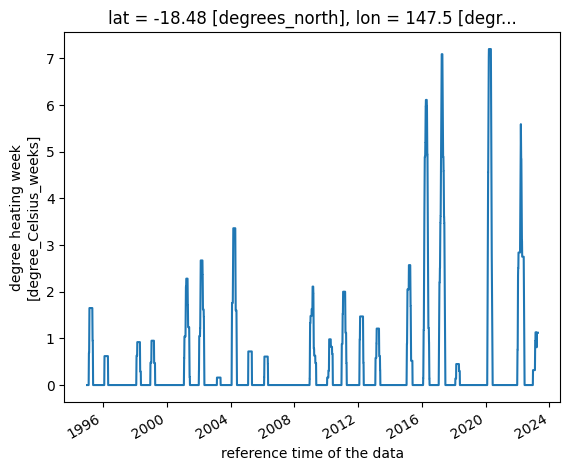

In [9]:
DHWts.plot()